# Heart Failure

### full SMOTE vesion

In [ ]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Load Dataset and Split Data

In [3]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [ ]:
# Load the dataset
clean_df = pd.read_csv('heart_failure_clean.csv')

In [ ]:
# select meaningful features
use_df = clean_df[['age','ejection_fraction','serum_sodium','time','ct_gr','DEATH_EVENT']]

In [ ]:
# Separate features and target label
X = use_df.drop(["DEATH_EVENT"],axis=1)
y = use_df['DEATH_EVENT']

In [ ]:
# Apply SMOTE to the entire dataset
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

In [ ]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_smote, y_smote, test_size=0.3, random_state=42)

## Model Training and Prediction

In [10]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report

In [ ]:
# set up StratifiedKFold for cross-validation (5-fold)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

### Random Forest

In [ ]:
# import model
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Initialize Random Forest model
model_rf = RandomForestClassifier(random_state=42)

In [ ]:
# Define hyperparameter search space
param_rf = {
    "n_estimators": [500, 1000, 1500],
    "max_depth": [5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

In [ ]:
# Hyperparameter tuning with GridSearchCV
gscv_rf = GridSearchCV(model_rf, param_rf, cv=cv, n_jobs=-1, scoring='accuracy')
gscv_rf.fit(X_train, y_train)

# Get the best model
MODEL_RF = gscv_rf.best_estimator_

# Predict
pred_rf = MODEL_RF.predict(X_test)

# Evaluate performance
print("Random Forest 결과")
print(classification_report(y_test, pred_rf))

Random Forest 결과
              precision    recall  f1-score   support

           0       0.88      0.86      0.87        57
           1       0.88      0.89      0.89        65

    accuracy                           0.88       122
   macro avg       0.88      0.88      0.88       122
weighted avg       0.88      0.88      0.88       122



### Decision Tree

In [ ]:
# import model
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Initialize Decision Tree model
model_dt = DecisionTreeClassifier(random_state=42)

In [ ]:
# Define hyperparameter search space
param_dt = {
    "max_depth": [3, 5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5]
}

In [ ]:
# Hyperparameter tuning with GridSearchCV
gscv_dt = GridSearchCV(model_dt, param_dt, cv=cv, n_jobs=-1, scoring='accuracy')
gscv_dt.fit(X_train, y_train)

# Get the best model
MODEL_DT = gscv_dt.best_estimator_

# Predict
pred_dt = MODEL_DT.predict(X_test)

# Evaluate performance
print("Decision Tree Test 결과")
print(classification_report(y_test, pred_dt))

Decision Tree Test 결과
              precision    recall  f1-score   support

           0       0.71      0.86      0.78        57
           1       0.85      0.69      0.76        65

    accuracy                           0.77       122
   macro avg       0.78      0.78      0.77       122
weighted avg       0.78      0.77      0.77       122



### SVM

In [ ]:
# import model
from sklearn.svm import SVC

In [ ]:
# Initialize Support Vector Machine model
model_svm = SVC(probability=True, random_state=42)

In [ ]:
# Define hyperparameter search space
param_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

In [ ]:
# Hyperparameter tuning with GridSearchCV
gscv_svm = GridSearchCV(model_svm, param_svm, cv=cv, n_jobs=-1, scoring='accuracy')
gscv_svm.fit(X_train, y_train)

# Get the best model
MODEL_SVM = gscv_svm.best_estimator_

# Predict
pred_svm = MODEL_SVM.predict(X_test)

# Evaluate performance
print("SVM Test 결과")
print(classification_report(y_test, pred_svm))

SVM Test 결과
              precision    recall  f1-score   support

           0       0.73      0.79      0.76        57
           1       0.80      0.74      0.77        65

    accuracy                           0.76       122
   macro avg       0.76      0.76      0.76       122
weighted avg       0.77      0.76      0.76       122



### Logistic Regression

In [ ]:
# import model
from sklearn.linear_model import LogisticRegression

In [ ]:
# Initialize Logistic Regression model
model_logreg = LogisticRegression(random_state=42)

In [ ]:
# Define hyperparameter search space
param_logreg = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l2']
}

In [ ]:
# Hyperparameter tuning with GridSearchCV
gscv_logreg = GridSearchCV(model_logreg, param_logreg, cv=cv, n_jobs=-1, scoring='accuracy')
gscv_logreg.fit(X_train, y_train)

# Get the best model
MODEL_LOGREG = gscv_logreg.best_estimator_

# Predict
pred_logreg = MODEL_LOGREG.predict(X_test)

# Evaluate performance
print("Logistic Regression Test 결과")
print(classification_report(y_test, pred_logreg))

Logistic Regression Test 결과
              precision    recall  f1-score   support

           0       0.73      0.81      0.77        57
           1       0.81      0.74      0.77        65

    accuracy                           0.77       122
   macro avg       0.77      0.77      0.77       122
weighted avg       0.77      0.77      0.77       122



### LightGBM

In [ ]:
# import model
from lightgbm import LGBMClassifier

In [ ]:
# Initialize LightGBM model
model_lgbm = LGBMClassifier(random_state=42,verbosity=-1)

In [ ]:
# Define hyperparameter search space
param_lgbm = {
    'n_estimators': [500, 1000, 2000],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'num_leaves': [15, 31, 63],
    'min_child_samples': [10, 20, 30]
}

In [ ]:
# Hyperparameter tuning with GridSearchCV
gscv_lgbm = GridSearchCV(model_lgbm, param_lgbm, cv=cv, n_jobs=-1, scoring='accuracy')
gscv_lgbm.fit(X_train, y_train)

# Get the best model
MODEL_LGBM = gscv_lgbm.best_estimator_

# Predict
y_pred_lgbm = MODEL_LGBM.predict(X_test)

# Evaluate performance
print("LGBM Test 결과")
print(classification_report(y_test, y_pred_lgbm))

LGBM Test 결과
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        57
           1       0.85      0.85      0.85        65

    accuracy                           0.84       122
   macro avg       0.84      0.84      0.84       122
weighted avg       0.84      0.84      0.84       122



### ANN

In [ ]:
# import model
from sklearn.neural_network import MLPClassifier

In [ ]:
# Initialize Neural Network model
model_ann = MLPClassifier(random_state=42, max_iter=500)

In [ ]:
# Define hyperparameter search space
param_ann = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

In [ ]:
# Hyperparameter tuning with GridSearchCV
gscv_ann = GridSearchCV(model_ann, param_ann, cv=cv, n_jobs=-1, scoring='accuracy')
gscv_ann.fit(X_train, y_train)

# Get the best model
MODEL_ANN = gscv_ann.best_estimator_

# Predict
y_pred_ann = MODEL_ANN.predict(X_test)

# Evaluate performance
print("ANN Test 결과")
print(classification_report(y_test, y_pred_ann))

ANN Test 결과
              precision    recall  f1-score   support

           0       0.78      0.89      0.84        57
           1       0.89      0.78      0.84        65

    accuracy                           0.84       122
   macro avg       0.84      0.84      0.84       122
weighted avg       0.84      0.84      0.84       122



## 모델 성능 비교

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

In [ ]:
# save models in a dictionary
models = {
    'RandomForest': MODEL_RF,
    'LogisticRegression': MODEL_LOGREG,
    'DecisionTree': MODEL_DT,
    'SVM': MODEL_SVM,
    'LightGBM': MODEL_LGBM,
    'ANN': MODEL_ANN
}

# results list
results = []

ROC Curve

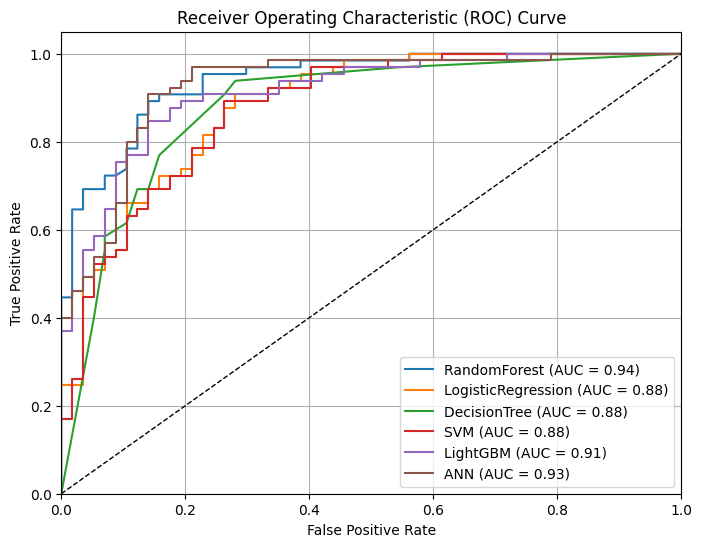

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

for name, model in models.items():
   
    y_pred = model.predict(X_test)
    y_score = model.predict_proba(X_test)[:, 1]

    # Calculate evaluation metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_score)

    # Save results
    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1,
        'AUC': roc_auc
    })

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_score)
    ax.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

ax.plot([0, 1], [0, 1], 'k--', lw=1)
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) Curve')
ax.legend(loc='lower right')
plt.grid()
plt.show()

Final Results Summary

In [ ]:
# DataFrame with results
results_df = pd.DataFrame(results)

# Sort models by AUC
results_df = results_df.sort_values(by='AUC', ascending=False).reset_index(drop=True)

# Display evaluation results
print(results_df)

                Model  Accuracy  Precision    Recall  F1-score       AUC
0        RandomForest  0.877049   0.878788  0.892308  0.885496  0.940486
1                 ANN  0.836066   0.894737  0.784615  0.836066  0.926586
2            LightGBM  0.836066   0.846154  0.846154  0.846154  0.911201
3  LogisticRegression  0.770492   0.813559  0.738462  0.774194  0.882591
4        DecisionTree  0.770492   0.849057  0.692308  0.762712  0.880972
5                 SVM  0.762295   0.800000  0.738462  0.768000  0.876653
